<a class="anchor" id="0"></a>

# In This Notebook we have compared and contrast some of the state of art machine learning model

I have build and trained 15 popular machine learning models.

<a class="anchor" id="0.1"></a>

## Table of Contents

1. [Import libraries](#1)
1. [Download datasets](#2)
1. [Analysis of data](#3)
1. [Preparing to modeling](#4)
1. [Model selections and tuning](#5)
    -  [Logistic Regression](#5.1)
    -  [Support Vector Machines](#5.2)
    -  [Linear SVC](#5.3)
    -  [k-Nearest Neighbors algorithm with GridSearchCV](#5.4)
    -  [Naive Bayes](#5.5)
    -  [Perceptron](#5.6)
    -  [Stochastic Gradient Descent](#5.7)
    -  [Decision Tree Classifier](#5.8)
    -  [Random Forests with GridSearchCV](#5.9)
    -  [XGB Classifier with HyperOpt](#5.10)
    -  [GradientBoostingClassifier with HyperOpt](#5.12)
    -  [BaggingClassifier](#5.14)
    -  [Neural Network 1](#5.16)
    -  [Neural Network 2](#5.17)
    -  [AdaBoost Classifier](#5.18) 
1. [Models evaluation](#6)

## 1. Import libraries <a class="anchor" id="1"></a>

[Back to Table of Contents](#0.1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg


# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import pandas_profiling as pp

# models
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

# NN models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping, ModelCheckpoint

# model tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

Using TensorFlow backend.


In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/svmlr/LR.png
/kaggle/input/svmlr/SVM.png
/kaggle/input/testvalidtrain/test-valid-train.png
/kaggle/input/gggggg/cardio_train.csv


## 2. Download datasets <a class="anchor" id="2"></a>

[Back to Table of Contents](#0.1)

Using pandas library to import the dataset in csv format.

In [3]:
data = pd.read_csv("/kaggle/input/gggggg/cardio_train.csv", sep=";")

In [4]:
data.drop("id",axis=1,inplace=True)
data.drop_duplicates(inplace=True)
# Creating a new column called bmi utilizing weights and height of users
data["bmi"] = data["weight"] / (data["height"]/100)**2
too_high = ((data["ap_hi"]>250) | (data["ap_lo"]>200))
data = data[~too_high]


In [5]:
too_large = ((data["ap_hi"] < 0) | (data["ap_lo"] < 0))
data = data[~too_large]

In [ ]:
data.head(3)

In [ ]:
data.info()

## 3. Analysis of data <a class="anchor" id="3"></a>

[Back to Table of Contents](#0.1)

In [ ]:
pp.ProfileReport(data)

## 4. Preparing to modeling <a class="anchor" id="4"></a>

[Back to Table of Contents](#0.1)

In [6]:
target = 'cardio'
data_target = data[target]
data = data.drop([target], axis=1)

Splitting data on 20% in the test dataset, the remaining 80% - in the training dataset

In [7]:
x_train, x_test, y_train, y_test = train_test_split(data, data_target, test_size=0.2, random_state=0)

In [ ]:
x_train.head(3)

In [ ]:
x_test.head(3)

In [ ]:
x_train.info()

In [ ]:
x_test.info()

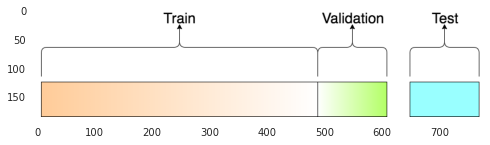

In [8]:
# split training set to validation set
# validation vs test : We use the validation set to measure the peromance of the trained model as the machine is learning to fine tune
# the model. Test set on the other hand is used to check the perfomance of the final trained model
img = mpimg.imread("../input/testvalidtrain/test-valid-train.png")
imgplot = plt.imshow(img)


Xtrain, Xval, Ztrain, Zval = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

## 5. Model selections and tuning <a class="anchor" id="5"></a>

[Back to Table of Contents](#0.1)

Although, there exist a large number of predictive modelling algorithms, not all of them are suitable in all cases.
Hence, our effort has been on idefitying the problem and consequently narrowing down the number of possible working agorthims according to the problem in hand.
Since the outcome of our problem is to be interpreted as probability of having the chance of developing disease or not, the continious nature of such output can be modeled using regression. Although regression models does not perform  staistical classifications, seting a cutoff can help to easily classify the resulting probabilitiy measures.

Furthermore, regression models are good tools in dealing with drawing corelation between one or many dependent variables and another independent categorical/binary variable. 
Per as this problem, our dependent variables are the age, gender, height and etc. while being healthy/unhealthy serves as our independent variable. 

To narrow down the list of possible algorithm one step further, we definitly need take into the account that we are perfoming a Supervised Machine Learning approach as we are traingng our machine using a given dataset.

Combining the two specifications, regression models with classification and being supervised, we can narrow down our choices to a few selected ones as follow : 

- Logistic Regression
- Support Vector Machines and Linear SVC
- KNN or k-Nearest Neighbors
- Naive Bayes Classifier or Gaussian Naive Bayes
- Stochastic Gradient Descent, GradientBoostingClassifier, RidgeClassifier, BaggingClassifier
- Decision Tree Classifier, Random Forest, XGB Classifier, LGBM Classifier, ExtraTreesClassifier
- Perceptron, Neural Networks with different archictures (Deep Learning)
- VotingClassifier (hard or soft voting)

### 5.1 Logistic Regression <a class="anchor" id="5.1"></a>

[Back to Table of Contents](#0.1)

**Logistic Regression** Logistic regression help in measuring the corelation between the categorical dependent variable known as our features and one or more independent variables (features) through probability estimation using a logistic function

UOFT : http://www.cs.toronto.edu/~kswersky/wp-content/uploads/svm_vs_lr.pdf

### Assign probability to each outcome
### Train to maximize likelihood 
### Linear decision boundary (with y being 0 or 1) 

Logistic regression focuses on maximizing the
probability of the data. The farther the data lies from
the separating hyperplane (on the correct side), the
happier LR is.


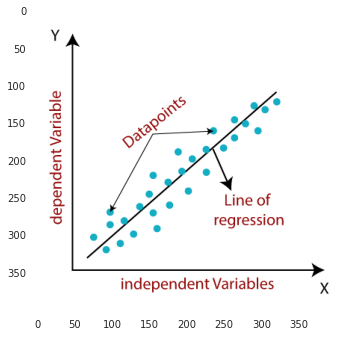

In [9]:
img = mpimg.imread("/kaggle/input/svmlr/LR.png")
imgplot = plt.imshow(img)


In [10]:
# Logistic Regression
# max_iter : Maximum number of iterations taken for the solvers to converge.
# n_jobs : specifies the number of processors to use
# score : Return the mean accuracy on the given test data and labels.(Mean accuracy of self.predict(X) wrt. y.)
# sample_weight : Array of weights that are assigned to individual samples. If not provided, then each sample is given unit weight.
# fit : Fit the model according to the given training data. and returns fitted estimator

logreg = LogisticRegression(max_iter=2000,n_jobs=1)

logreg.fit(x_train, y_train,sample_weight=1)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log



72.33

In [11]:
acc_test_log = round(logreg.score(x_test, y_test) * 100, 2)
acc_test_log

72.62

The odds ratio is the probability of being healthy/probability of being unhealhty.
As an equation, that’s P(healthy)/P(unhealthy), where P(healthy) is the probability of being healthy, and P(unhealthy) the probability of ‘being unhealhty’ (the complement of healthy).

Taking the logarithm of the odds ratio gives us the **log odds** of being healthy, which can be written as

log(healthy) = log(P(healthy)/P(unhealthy)),

Since the probability of an event happening, P(unhealthy) is equal to the probability of an event not happening, 1 – P(healthy), we can write the log odds as **log [p(healthy)/(1-p(healthy)]
**

When a function’s variable represents a probability,p (as in the function above), it’s called the logit function .

Logistic regression can also be used to validate our decision making for selecting the featrues. The latter can be achieved by computing the coefficient of the features with respect to the output of our decision function.


Positive coefficients lead to an increase in the log odds of the response which means it increases the probability.
Negative coefficients lead to decrease in the log odds of the response which means it decreases the probability.
As per in this case, cholesterol has the most positive corelation with being healthy/unhealthy.


- *gluc* and *cholesterol* has highest coefficients
This logically make sense as we are using the cadiovascular status as the predictor for our individuals' health predictions.
It is important to note that such corelations can result in different numbers if we change one/any parameters. 


In [12]:
#coeff_ : Coefficient of the features in the decision function.

coeff_df = pd.DataFrame(x_train.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)


,Feature,Correlation
6,cholesterol,0.393303
7,gluc,0.078584
3,weight,0.070832
4,ap_hi,0.045545
5,ap_lo,0.019448
1,gender,0.011325
0,age,0.000132
8,smoke,-0.022047
9,alco,-0.027054
2,height,-0.069876


### 5.2 Support Vector Machines <a class="anchor" id="5.2"></a>

[Back to Table of Contents](#0.1)

******Support Vector Machines** are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine).


UOFT: http://www.cs.toronto.edu/~kswersky/wp-content/uploads/svm_vs_lr.pdf
Medium : https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769

### Enforce a margin of separation (here, y E {0,1})
### Train to find the maximum margin 
### Linear decision boundary 
### Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

An SVM tries to find the separating hyperplane that
maximizes the distance of the closest points to the
margin (the support vectors). If a point is not a
support vector, it doesn’t really matter. 

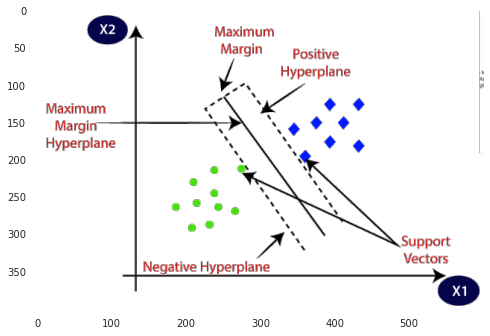

In [13]:
img = mpimg.imread("/kaggle/input/svmlr/SVM.png")
imgplot = plt.imshow(img)

In [ ]:
# Support Vector Machines
# Kernal : The function of kernel is to take data as input and calculate it as if (kernal trick not computation insentive) they have been transform to the required form
# kernal option : 'rbf' is the default. others are poly, sigmoid and etc. radial basis kernel function
# gamma : non linear hyperplanes . it is the Kernel coefficient and the default value for svc is 'scale' : 1 / (n_features * X.var()) as value of gamma
# C : is the penalty parameter of the error term (howmuch to penalize when wrong)


# Bias/variance tradeof:
# once we use a classification that are.sensetive to training data and does not allow misclassification the we will have
# low bias and, perfomed poorly on new data so high variance. 
# when classify with less sensitivy to training data we ll have more bias and less variance.

# soft margine : when allowing missclassification then the distance of to classifier is called the soft margin
# usinng soft margine to determine the location of threshhold we are using SMC or support vector classifier.

# if we have n dimentional graph (n feareus) the support vector is plane/hyper plane flat affine n-1 dimetional subspace
# all flat affine are hyperplane( even the 1 dimention - we only use the term when cannot draw it)

#SVC: can handle outlier, and can alow misclassifcation and over lapping ones 

# ALL we talked about is around support vector classifier that cannot classify set of points between two clusters.
# for instance we cannot classify well using svc for data x and o when we have oooooo------xxxx------ooooo 
# there is no single place to put the classifier to classifier correctly. 
# so we use SUPPORT VECTOR MACHINES : 
# for instnace we can make antoher axis and use value^2 and make our data to 2 dimentional !!!
# steps: start with lower dimention, move data to a higher dimention, then use SV classifier to seprate data
# but how to transfor(move) data (what degree to move to): we use the kernal functions ! the kernal compute the relationship between each
# pair of relationships. (we can find the degree by doing cross-validation manually)
# Example: kernal : Radial basis fucntion - find the classifer in infinit dimention.
# it works like a weited nearest neighbour alg where closer data points weigh more toward classifying the new data point.
#and those futher away has less effect.

svc = SVC()
svc.fit(x_train, y_train)

acc_svc = round(svc.score(x_train, y_train) * 100, 2)
acc_svc


In [ ]:
acc_test_svc = round(svc.score(x_test, y_test) * 100, 2)
acc_test_svc

In [ ]:
def plotSVC(title):
  # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))
    plt.subplot(1, 1, 1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.title(title)
    plt.show()
    



In [ ]:
# kernel parameters selects the type of hyperplane used to separate the data.
# lets look at some different kernels applied on our dataset
kernels = ["linear", "rbf", "poly"]
for kernel in kernels:
    svc = SVC(kernel=kernel).fit(x_train, y_train)
    plotSVC("kernel=" + str(kernel))

In [ ]:
#Gamma
# The higher the gamma value it tries to exactly fit the training data set
# We can see that increasing gamma leads to overfitting as the classifier tries to perfectly fit the training data

### 5.3 Linear SVC <a class="anchor" id="5.3"></a>

[Back to Table of Contents](#0.1)

Thanks to https://www.kaggle.com/startupsci/titanic-data-science-solutions

**SVC** is a similar to SVM method. Its also builds on kernel functions but is appropriate for unsupervised learning. Reference [Wikipedia](https://en.wikipedia.org/wiki/Support-vector_machine#Support-vector_clustering_(SVC).

In [ ]:
# Linear SVC

linear_svc = LinearSVC(dual=False)  # dual=False when n_samples > n_features.
linear_svc.fit(train, target)
acc_linear_svc = round(linear_svc.score(train, target) * 100, 2)
acc_linear_svc

In [ ]:
acc_test_linear_svc = round(linear_svc.score(test, target_test) * 100, 2)
acc_test_linear_svc

### 5.4 k-Nearest Neighbors algorithm <a class="anchor" id="5.4"></a>

[Back to Table of Contents](#0.1)

Thanks to https://www.kaggle.com/startupsci/titanic-data-science-solutions

In pattern recognition, the **k-Nearest Neighbors algorithm** (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). Reference [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

In [ ]:
# k-Nearest Neighbors algorithm

knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [2, 3]}, cv=10).fit(train, target)
acc_knn = round(knn.score(train, target) * 100, 2)
print(acc_knn, knn.best_params_)

In [ ]:
acc_test_knn = round(knn.score(test, target_test) * 100, 2)
acc_test_knn

### 5.5 Naive Bayes <a class="anchor" id="5.5"></a>

[Back to Table of Contents](#0.1)

Thanks to https://www.kaggle.com/startupsci/titanic-data-science-solutions

In machine learning, **Naive Bayes classifiers** are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. Reference [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train, target)
acc_gaussian = round(gaussian.score(train, target) * 100, 2)
acc_gaussian

In [ ]:
acc_test_gaussian = round(gaussian.score(test, target_test) * 100, 2)
acc_test_gaussian

### 5.6 Perceptron <a class="anchor" id="5.6"></a>

[Back to Table of Contents](#0.1)

Thanks to https://www.kaggle.com/startupsci/titanic-data-science-solutions

The **Perceptron** is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time. Reference [Wikipedia](https://en.wikipedia.org/wiki/Perceptron).

In [ ]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(train, target)
acc_perceptron = round(perceptron.score(train, target) * 100, 2)
acc_perceptron

In [ ]:
acc_test_perceptron = round(perceptron.score(test, target_test) * 100, 2)
acc_test_perceptron

### 5.7 Stochastic Gradient Descent <a class="anchor" id="5.7"></a>

[Back to Table of Contents](#0.1)

Thanks to https://www.kaggle.com/startupsci/titanic-data-science-solutions

**Stochastic gradient descent** (often abbreviated **SGD**) is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable or subdifferentiable). It can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a randomly selected subset of the data). Especially in big data applications this reduces the computational burden, achieving faster iterations in trade for a slightly lower convergence rate. Reference [Wikipedia](https://en.wikipedia.org/wiki/Stochastic_gradient_descent).

In [ ]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(train, target)
acc_sgd = round(sgd.score(train, target) * 100, 2)
acc_sgd

In [ ]:
acc_test_sgd = round(sgd.score(test, target_test) * 100, 2)
acc_test_sgd

### 5.8 Decision Tree Classifier <a class="anchor" id="5.8"></a>

[Back to Table of Contents](#0.1)

Thanks to https://www.kaggle.com/startupsci/titanic-data-science-solutions

This model uses a **Decision Tree** as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

In [ ]:
# Decision Tree Classifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, target)
acc_decision_tree = round(decision_tree.score(train, target) * 100, 2)
acc_decision_tree

In [ ]:
acc_test_decision_tree = round(decision_tree.score(test, target_test) * 100, 2)
acc_test_decision_tree

### 5.9 Random Forests <a class="anchor" id="5.9"></a>

[Back to Table of Contents](#0.1)

Thanks to https://www.kaggle.com/startupsci/titanic-data-science-solutions

**Random Forests** is one of the most popular model. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators= [100, 300]) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

In [ ]:
# Random Forest

random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 300]}, cv=5).fit(train, target)
random_forest.fit(train, target)
acc_random_forest = round(random_forest.score(train, target) * 100, 2)
print(acc_random_forest,random_forest.best_params_)

In [ ]:
acc_test_random_forest = round(random_forest.score(test, target_test) * 100, 2)
acc_test_random_forest

### 5.10 XGB Classifier <a class="anchor" id="5.10"></a>

[Back to Table of Contents](#0.1)

XGBoost is an ensemble tree method that apply the principle of boosting weak learners (CARTs generally) using the gradient descent architecture. XGBoost improves upon the base Gradient Boosting Machines (GBM) framework through systems optimization and algorithmic enhancements. Reference [Towards Data Science.](https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d)

We will tuning the hyperparameters of the XGBClassifier model using the HyperOpt and 10-fold crossvalidation

In [ ]:
def hyperopt_xgb_score(params):
    clf = XGBClassifier(**params)
    current_score = cross_val_score(clf, train, target, cv=10).mean()
    print(current_score, params)
    return current_score 
 
space_xgb = {
            'learning_rate': hp.quniform('learning_rate', 0, 0.05, 0.0001),
            'n_estimators': hp.choice('n_estimators', range(100, 1000)),
            'eta': hp.quniform('eta', 0.025, 0.5, 0.005),
            'max_depth':  hp.choice('max_depth', np.arange(2, 12, dtype=int)),
            'min_child_weight': hp.quniform('min_child_weight', 1, 9, 0.025),
            'subsample': hp.quniform('subsample', 0.5, 1, 0.005),
            'gamma': hp.quniform('gamma', 0.5, 1, 0.005),
            'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.005),
            'eval_metric': 'auc',
            'objective': 'binary:logistic',
            'booster': 'gbtree',
            'tree_method': 'exact',
            'silent': 1,
            'missing': None
        }
 
best = fmin(fn=hyperopt_xgb_score, space=space_xgb, algo=tpe.suggest, max_evals=10)
print('best:')
print(best)

In [ ]:
params = space_eval(space_xgb, best)
params

In [ ]:
XGB_Classifier = XGBClassifier(**params)
XGB_Classifier.fit(train, target)
acc_XGB_Classifier = round(XGB_Classifier.score(train, target) * 100, 2)
acc_XGB_Classifier

In [ ]:
acc_test_XGB_Classifier = round(XGB_Classifier.score(test, target_test) * 100, 2)
acc_test_XGB_Classifier

In [ ]:
fig =  plt.figure(figsize = (15,15))
axes = fig.add_subplot(111)
xgb.plot_importance(XGB_Classifier,ax = axes,height =0.5)
plt.show();
plt.close()

### 5.12 GradientBoostingClassifier <a class="anchor" id="5.12"></a>

[Back to Table of Contents](#0.1)

Thanks to https://www.kaggle.com/kabure/titanic-eda-model-pipeline-keras-nn

**Gradient Boosting** builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced. The features are always randomly permuted at each split. Therefore, the best found split may vary, even with the same training data and max_features=n_features, if the improvement of the criterion is identical for several splits enumerated during the search of the best split. To obtain a deterministic behaviour during fitting, random_state has to be fixed. Reference [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).

In [ ]:
def hyperopt_gb_score(params):
    clf = GradientBoostingClassifier(**params)
    current_score = cross_val_score(clf, train, target, cv=10).mean()
    print(current_score, params)
    return current_score 
 
space_gb = {
            'n_estimators': hp.choice('n_estimators', range(100, 1000)),
            'max_depth': hp.choice('max_depth', np.arange(2, 10, dtype=int))            
        }
 
best = fmin(fn=hyperopt_gb_score, space=space_gb, algo=tpe.suggest, max_evals=10)
print('best:')
print(best)

In [ ]:
params = space_eval(space_gb, best)
params

In [ ]:
# Gradient Boosting Classifier

gradient_boosting = GradientBoostingClassifier(**params)
gradient_boosting.fit(train, target)
acc_gradient_boosting = round(gradient_boosting.score(train, target) * 100, 2)
acc_gradient_boosting

In [ ]:
acc_test_gradient_boosting = round(gradient_boosting.score(test, target_test) * 100, 2)
acc_test_gradient_boosting

### 5.14 BaggingClassifier <a class="anchor" id="5.14"></a>

[Back to Table of Contents](#0.1)

Thanks to https://www.kaggle.com/kabure/titanic-eda-model-pipeline-keras-nn

Bootstrap aggregating, also called **bagging**, is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting. Although it is usually applied to decision tree methods, it can be used with any type of method. Bagging is a special case of the model averaging approach. Bagging leads to "improvements for unstable procedures", which include, for example, artificial neural networks, classification and regression trees, and subset selection in linear regression. On the other hand, it can mildly degrade the performance of stable methods such as K-nearest neighbors. Reference [Wikipedia](https://en.wikipedia.org/wiki/Bootstrap_aggregating).

A **Bagging classifier** is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it. Reference [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html).

In [ ]:
# Bagging Classifier

bagging_classifier = BaggingClassifier()
bagging_classifier.fit(train, target)
Y_pred = bagging_classifier.predict(test).astype(int)
acc_bagging_classifier = round(bagging_classifier.score(train, target) * 100, 2)
acc_bagging_classifier

In [ ]:
acc_test_bagging_classifier = round(bagging_classifier.score(test, target_test) * 100, 2)
acc_test_bagging_classifier

### 5.16 Neural Network 1 <a class="anchor" id="5.16"></a>

[Back to Table of Contents](#0.1)

Thanks to https://www.kaggle.com/nhlr21/complete-titanic-tutorial-with-ml-nn-ensembling

**Neural networks** are more complex and more powerful algorithm than standars machine learning, it belongs to deep learning models. To build a neural network use Keras. Keras is a high level API for tensorflow, which is a tensor-manipulation framework made by google. Keras allows you to build neural networks by assembling blocks (which are the layers of neural network). 

In [ ]:
def build_ann(optimizer='adam'):
    
    # Initializing the ANN
    ann = Sequential()
    
    # Adding the input layer and the first hidden layer of the ANN with dropout
    ann.add(Dense(units=32, kernel_initializer='glorot_uniform', activation='relu', input_shape=(len(train.columns),)))
    
    # Add other layers, it is not necessary to pass the shape because there is a layer before
    ann.add(Dense(units=64, kernel_initializer='glorot_uniform', activation='relu'))
    ann.add(Dropout(rate=0.5))
    ann.add(Dense(units=64, kernel_initializer='glorot_uniform', activation='relu'))
    ann.add(Dropout(rate=0.5))
    
    # Adding the output layer
    ann.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    
    # Compiling the ANN
    ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return ann

In [ ]:
opt = optimizers.Adam(lr=0.001)
ann = build_ann(opt)
# Training the ANN
history = ann.fit(Xtrain, Ztrain, batch_size=16, epochs=100, validation_data=(Xval, Zval))

In [ ]:
# Predicting the Train set results
ann_prediction = ann.predict(train)
ann_prediction = (ann_prediction > 0.5)*1 # convert probabilities to binary output

# Compute error between predicted data and true response and display it in confusion matrix
acc_ann1 = round(metrics.accuracy_score(target, ann_prediction) * 100, 2)
acc_ann1

In [ ]:
# Predicting the Test set results
ann_prediction_test = ann.predict(test)
ann_prediction_test = (ann_prediction_test > 0.5)*1 # convert probabilities to binary output

# Compute error between predicted data and true response and display it in confusion matrix
acc_test_ann1 = round(metrics.accuracy_score(target_test, ann_prediction_test) * 100, 2)
acc_test_ann1

### 5.17 Neural Network 2 <a class="anchor" id="5.17"></a>

[Back to Table of Contents](#0.1)

Thanks to https://www.kaggle.com/junheeshin/titanic-analyze-and-predict-nn

In [ ]:
# Model
model = Sequential()
model.add(Dense(16, input_dim = train.shape[1], init = 'he_normal', activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(64, init = 'he_normal', activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(32, init = 'he_normal', activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', patience=20, mode='max')
hist = model.fit(train, target, batch_size=64, validation_data=(Xval, Zval), 
               epochs=500, verbose=1, callbacks=[es])

In [ ]:
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
# plt.plot(hist.history['acc'], label='acc')
# plt.plot(hist.history['val_acc'], label='val_acc')
plt.ylim((0, 1))
plt.legend()

In [ ]:
# Predicting the Train set results
nn_prediction = model.predict(train)
nn_prediction = (nn_prediction > 0.5)*1 # convert probabilities to binary output

# Compute error between predicted data and true response
acc_ann2 = round(metrics.accuracy_score(target, nn_prediction) * 100, 2)
acc_ann2

In [ ]:
# Predicting the Test set results
nn_prediction_test = model.predict(test)
nn_prediction_test = (nn_prediction_test > 0.5)*1 # convert probabilities to binary output

# Compute error between predicted data and true response
acc_test_ann2 = round(metrics.accuracy_score(target_test, nn_prediction_test) * 100, 2)
acc_test_ann2

### 5.18 AdaBoost Classifier <a class="anchor" id="5.18"></a>

[Back to Table of Contents](#0.1)

Thanks to https://scikit-learn.org/stable/modules/ensemble.html#adaboost

The core principle of **AdaBoost** is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction. The data modifications at each so-called boosting iteration consist of applying N weights to each of the training samples. Initially, those weights are all set to 1/N, so that the first step simply trains a weak learner on the original data. For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence. Reference [sklearn documentation](https://scikit-learn.org/stable/modules/ensemble.html#adaboost).

In [ ]:
def hyperopt_ab_score(params):
    clf = AdaBoostClassifier(**params)
    current_score = cross_val_score(clf, train, target, cv=10).mean()
    print(current_score, params)
    return current_score 
 
space_ab = {
            'n_estimators': hp.choice('n_estimators', range(50, 1000)),
            'learning_rate': hp.quniform('learning_rate', 0, 0.05, 0.0001)       
        }
 
best = fmin(fn=hyperopt_ab_score, space=space_ab, algo=tpe.suggest, max_evals=10)
print('best:')
print(best)

In [ ]:
params = space_eval(space_ab, best)
params

In [ ]:
# AdaBoost Classifier

Ada_Boost = AdaBoostClassifier(**params)
Ada_Boost.fit(train, target)
Ada_Boost.score(train, target)
acc_AdaBoost = round(Ada_Boost.score(train, target) * 100, 2)
acc_AdaBoost

In [ ]:
acc_test_AdaBoost = round(Ada_Boost.score(test, target_test) * 100, 2)
acc_test_AdaBoost

## 6. Models evaluation <a class="anchor" id="6"></a>

[Back to Table of Contents](#0.1)

We can now rank our evaluation of all the models to choose the best one for our problem.

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 'k-Nearest Neighbors', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent', 
              'Decision Tree Classifier', 'Random Forest',  'XGBClassifier', 
              'GradientBoostingClassifier', 
              'BaggingClassifier', 
              'Neural Network 1', 'Neural Network 2', 
              'AdaBoostClassifier'],
    
    'Score_train': [acc_log, acc_svc, acc_linear_svc, acc_knn, acc_gaussian, 
              acc_perceptron, acc_sgd, 
              acc_decision_tree, acc_random_forest, acc_XGB_Classifier, 
              acc_gradient_boosting, 
                    acc_bagging_classifier, 
              acc_ann1, acc_ann2, 
              acc_AdaBoost],
    'Score_test': [acc_test_log, acc_test_svc, acc_test_linear_svc, acc_test_knn, acc_test_gaussian, 
              acc_test_perceptron, acc_test_sgd, 
              acc_test_decision_tree, acc_test_random_forest, acc_test_XGB_Classifier, 
              acc_test_gradient_boosting, 
                   acc_test_bagging_classifier, 
              acc_test_ann1, acc_test_ann2, 
              acc_test_AdaBoost]
                    })

In [ ]:
models.sort_values(by=['Score_train', 'Score_test'], ascending=False)

In [ ]:
models.sort_values(by=['Score_test', 'Score_train'], ascending=False)

In [ ]:
models['Score_diff'] = abs(models['Score_train'] - models['Score_test'])
models.sort_values(by=['Score_diff'], ascending=True)

In [ ]:
# Plot
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['Score_train'], label = 'Score_train')
plt.plot(xx, models['Score_test'], label = 'Score_test')
plt.legend()
plt.title('Score of 20 popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('Score, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

I hope you find this kernel useful and enjoyable.

Your comments and feedback are most welcome.

[Go to Top](#0)